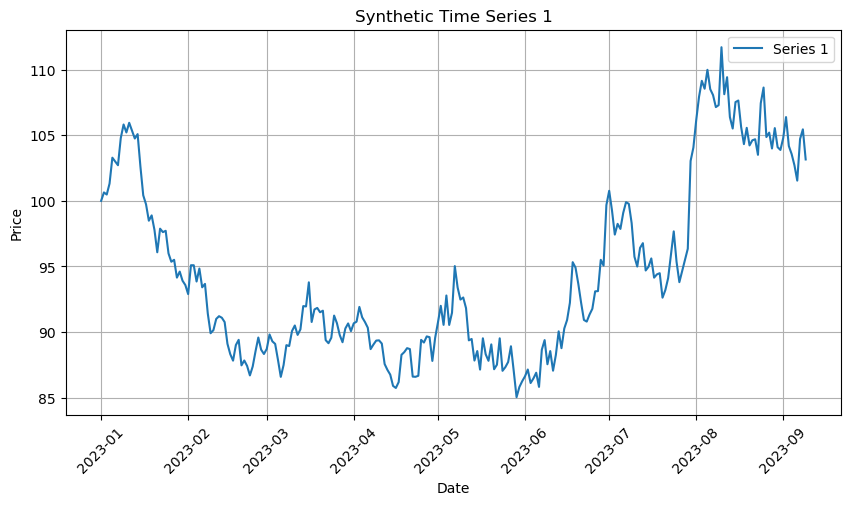

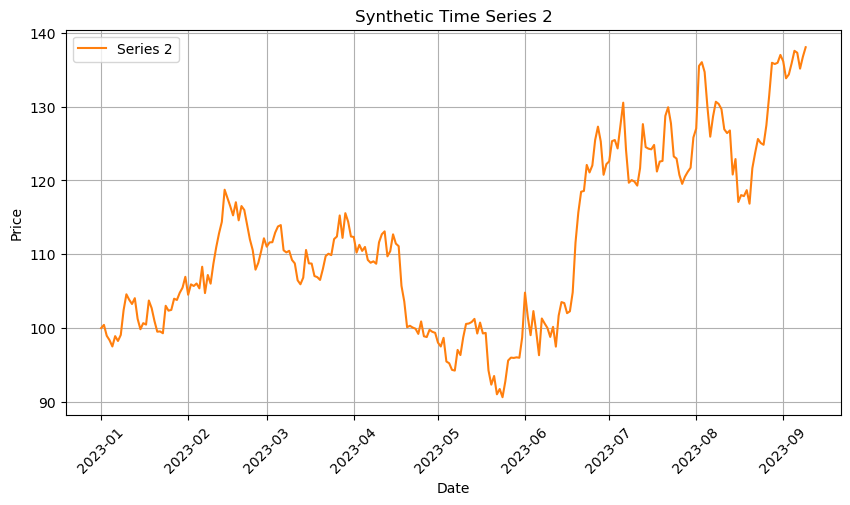

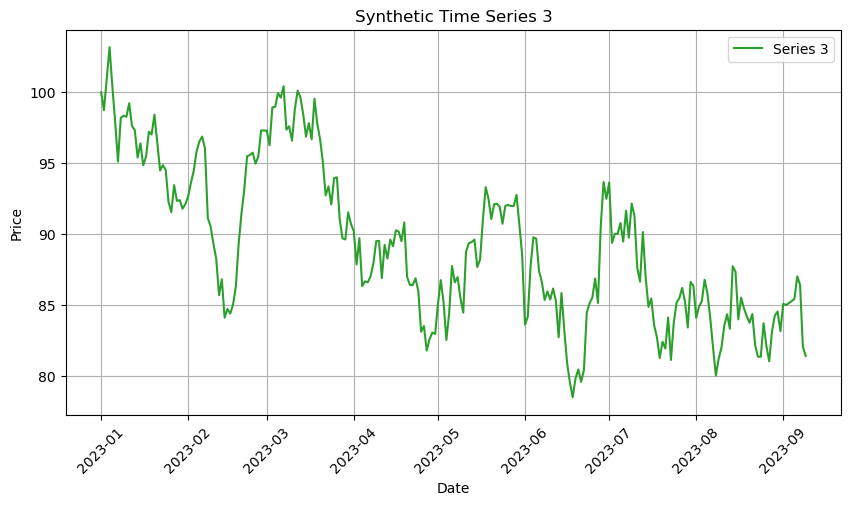

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Folder where the CSV files are stored
DATA_FOLDER = "data/"

# List of CSV files for the first three synthetic series
csv_files = [os.path.join(DATA_FOLDER, f"synthetic_series_{i+1}.csv") for i in range(3)]

# Function to read and plot synthetic time series separately
def plot_synthetic_series_separate(csv_files):
    for i, csv_file in enumerate(csv_files):
        if os.path.exists(csv_file):
            # Read CSV
            df = pd.read_csv(csv_file, parse_dates=["Date"])

            # Create a new figure for each series
            plt.figure(figsize=(10, 5))
            plt.plot(df["Date"], df["Price"], label=f"Series {i+1}", color=f"C{i}")

            # Formatting
            plt.xlabel("Date")
            plt.ylabel("Price")
            plt.title(f"Synthetic Time Series {i+1}")
            plt.legend()
            plt.xticks(rotation=45)
            plt.grid(True)
            plt.show()
        else:
            print(f"⚠️ Warning: {csv_file} not found. Skipping...")

# Plot each series separately
plot_synthetic_series_separate(csv_files)


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models.nbeatsx import NBeatsX  # Ensure correct import

# 🛠 Load Synthetic Data (3 CSV Files)
data_files = ["data/synthetic_series_1.csv", "data/synthetic_series_2.csv", "data/synthetic_series_3.csv"]

# 📌 Model Parameters
input_size = 30  # Lookback window
exog_size = 3    # Example: market index, volatility, economic indicators
output_size = 1  # Predicting next time step
hidden_units = 256
num_blocks = 3
epochs = 50
batch_size = 32
learning_rate = 0.001

# 🚀 Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📌 Data Preprocessing Function
def prepare_data(df, input_size, exog_size):
    prices = df["Price"].values
    dates = df["Date"].values
    
    # Generate exogenous factors (randomized for testing)
    np.random.seed(42)
    exog_factors = np.random.uniform(0.9, 1.1, size=(len(prices), exog_size))

    X, Y, Exog = [], [], []
    for i in range(len(prices) - input_size):
        X.append(prices[i:i+input_size])
        Y.append(prices[i+input_size])  # Predict next time step
        Exog.append(exog_factors[i+input_size])  # Exog data aligns with target
    
    # Convert to Tensors
    X, Y, Exog = map(lambda x: torch.tensor(x, dtype=torch.float32), (X, Y, Exog))
    
    return X, Y.unsqueeze(1), Exog  # Ensure correct shape for training

# 🚀 Training Loop
def train_model(model, X_train, Y_train, Exog_train, epochs, batch_size, lr):
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i:i+batch_size].to(device)
            y_batch = Y_train[i:i+batch_size].to(device)
            exog_batch = Exog_train[i:i+batch_size].to(device)
            
            optimizer.zero_grad()
            preds = model(x_batch, exog_batch)
            loss = criterion(preds, y_batch)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / (len(X_train) // batch_size)
        losses.append(avg_loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {avg_loss:.4f}")
    
    return losses

# 🚀 Train & Evaluate on Each Dataset
plt.figure(figsize=(12, 6))

for idx, file in enumerate(data_files):
    print(f"\n🔄 Training on {file}...\n")
    
    # 📌 Load & Prepare Data
    df = pd.read_csv(file)
    X_train, Y_train, Exog_train = prepare_data(df, input_size, exog_size)
    
    # 📌 Initialize Model
    model = NBeatsX(input_size=input_size, exog_size=exog_size, output_size=output_size, num_blocks=num_blocks, hidden_units=hidden_units).to(device)
    
    # 📌 Train Model
    losses = train_model(model, X_train, Y_train, Exog_train, epochs, batch_size, learning_rate)
    
    # 📈 Plot Training Loss
    plt.plot(losses, label=f"Series {idx+1}")

    # 📌 Make Predictions
    model.eval()
    with torch.no_grad():
        test_preds = model(X_train.to(device), Exog_train.to(device)).cpu().numpy()

    # 📊 Plot Forecasts
    plt.figure(figsize=(10, 4))
    plt.plot(Y_train.numpy(), label="Actual Price", linestyle="dashed", color="black")
    plt.plot(test_preds, label="Predicted Price", color="red", alpha=0.7)
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price")
    plt.title(f"NBeatsX Predictions on {file.split('/')[-1]}")
    plt.legend()
    plt.show()

# 🎯 Final Loss Graph
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.show()



🔄 Training on data/synthetic_series_1.csv...



RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

<Figure size 1200x600 with 0 Axes>

1️⃣ CTTS Model (CNN + Transformer Time Series)


🔹 Training on data/synthetic_series_1.csv 🔹


/opt/anaconda3/envs/finance/lib/python3.13/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0: Loss 0.0639
Epoch 10: Loss 0.2180
Epoch 20: Loss 0.1086
Epoch 30: Loss 0.0734
Epoch 40: Loss 0.0623


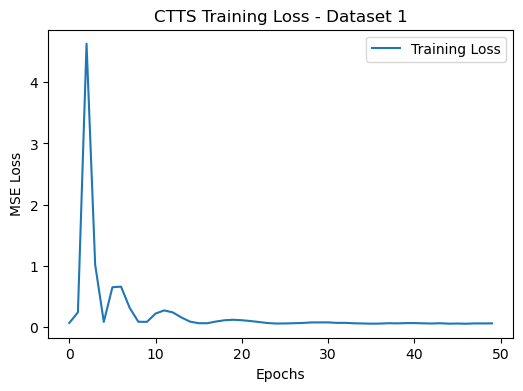

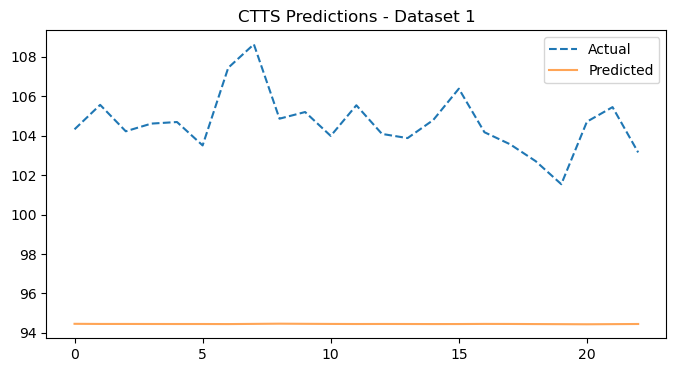


🔹 Training on data/synthetic_series_2.csv 🔹


/opt/anaconda3/envs/finance/lib/python3.13/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0: Loss 0.0800
Epoch 10: Loss 0.2850
Epoch 20: Loss 0.1150
Epoch 30: Loss 0.0775
Epoch 40: Loss 0.0651


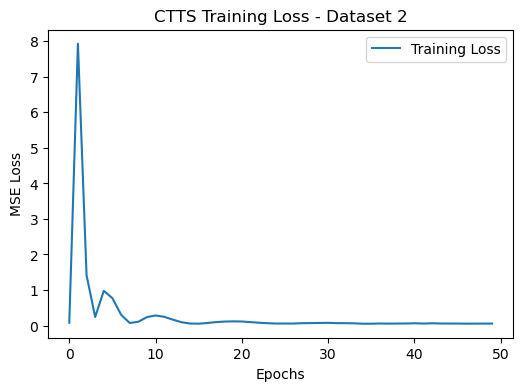

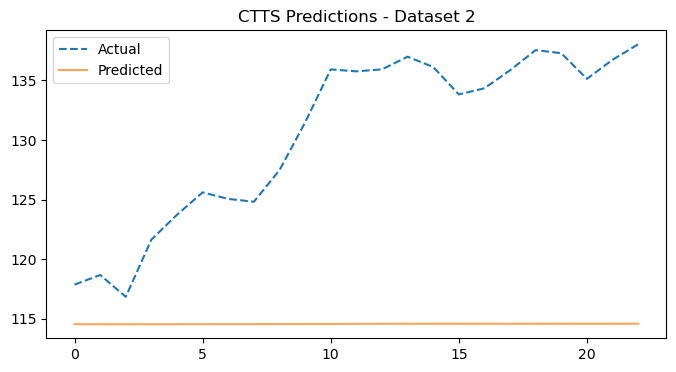


🔹 Training on data/synthetic_series_3.csv 🔹


/opt/anaconda3/envs/finance/lib/python3.13/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0: Loss 0.5117
Epoch 10: Loss 0.0758
Epoch 20: Loss 0.0509
Epoch 30: Loss 0.0483
Epoch 40: Loss 0.0512


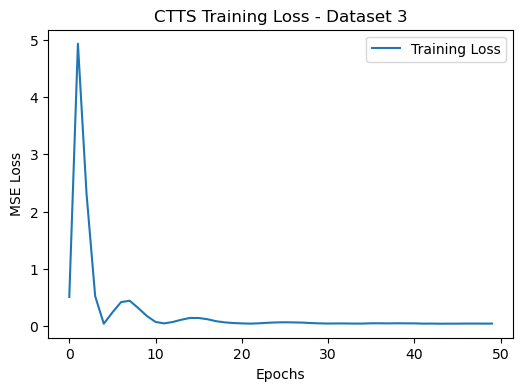

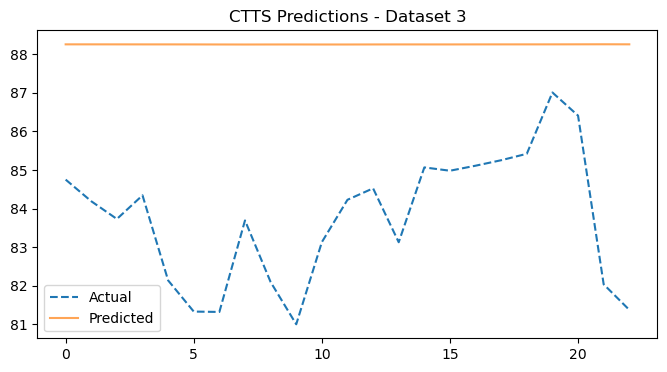

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models.ctts import CTTS

# Load synthetic data
def load_synthetic_data(file_path, input_size=30):
    df = pd.read_csv(file_path)
    prices = df["Price"].values
    
    # Normalize data
    min_price, max_price = np.min(prices), np.max(prices)
    prices = (prices - min_price) / (max_price - min_price)

    # Prepare sequences
    X, Y = [], []
    for i in range(len(prices) - input_size):
        X.append(prices[i:i+input_size])
        Y.append(prices[i+input_size])
    
    X, Y = np.array(X), np.array(Y)
    return torch.tensor(X, dtype=torch.float32).unsqueeze(1), torch.tensor(Y, dtype=torch.float32), min_price, max_price

# Training function
def train_ctts(model, X_train, Y_train, epochs=50, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    losses = []
    X_train, Y_train = X_train.to(device), Y_train.to(device)

    for epoch in range(epochs):
        optimizer.zero_grad()
        preds = model(X_train).squeeze()
        loss = criterion(preds, Y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss {loss.item():.4f}")

    return losses

# Prediction function
def evaluate_ctts(model, X_test, min_price, max_price):
    model.eval()
    with torch.no_grad():
        preds = model(X_test.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))).cpu().numpy()
    
    # Rescale predictions back to original price scale
    return preds * (max_price - min_price) + min_price

# Load and train on 3 datasets
file_paths = ["data/synthetic_series_1.csv", "data/synthetic_series_2.csv", "data/synthetic_series_3.csv"]
input_size = 30
epochs = 50

for idx, file_path in enumerate(file_paths):
    print(f"\n🔹 Training on {file_path} 🔹")

    # Load data
    X, Y, min_price, max_price = load_synthetic_data(file_path, input_size)

    # Split into train & test (90% train, 10% test)
    split_idx = int(len(X) * 0.9)
    X_train, Y_train = X[:split_idx], Y[:split_idx]
    X_test, Y_test = X[split_idx:], Y[split_idx:]

    # Initialize & train model
    model = CTTS(input_channels=1, hidden_units=64, output_size=1)
    losses = train_ctts(model, X_train, Y_train, epochs=epochs)

    # Plot training loss
    plt.figure(figsize=(6, 4))
    plt.plot(losses, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title(f"CTTS Training Loss - Dataset {idx+1}")
    plt.legend()
    plt.show()

    # Evaluate model
    predictions = evaluate_ctts(model, X_test, min_price, max_price)

    # Plot actual vs predicted
    plt.figure(figsize=(8, 4))
    plt.plot(Y_test.numpy() * (max_price - min_price) + min_price, label="Actual", linestyle="dashed")
    plt.plot(predictions, label="Predicted", alpha=0.7)
    plt.title(f"CTTS Predictions - Dataset {idx+1}")
    plt.legend()
    plt.show()


2️⃣ Temporal Fusion Transformer (TFT)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.tft import TemporalFusionTransformer  # Import the corrected TFT model

# Load synthetic data
df = pd.read_csv("data/synthetic_series_2.csv", parse_dates=["Date"])
prices = df["Price"].values

# Prepare dataset
input_size = 30
X_train = [prices[i:i+input_size] for i in range(len(prices) - input_size)]
Y_train = [prices[i+input_size] for i in range(len(prices) - input_size)]
X_train, Y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(Y_train, dtype=torch.float32)

# Model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TemporalFusionTransformer(input_size=input_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    preds = model(X_train.to(device)).squeeze()
    loss = criterion(preds, Y_train.to(device))
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(losses, label="Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("TFT Training Loss")
plt.legend()
plt.show()

# Generate test predictions
model.eval()
with torch.no_grad():
    test_preds = model(X_train.to(device)).cpu().numpy()

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(Y_train.numpy(), label="Actual Price", linestyle="dashed", color="black")
plt.plot(test_preds, label="Predicted Price", color="red", alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("TFT Predictions on Synthetic Data")
plt.legend()
plt.show()


/opt/anaconda3/envs/finance/lib/python3.13/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3

3️⃣ DeepAR Model (Autoregressive RNN)

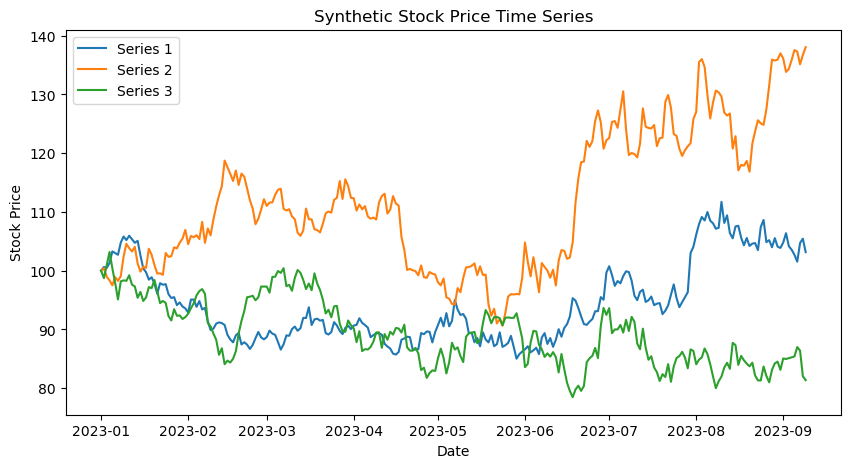

/opt/anaconda3/envs/finance/lib/python3.13/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([222, 1])) that is different to the input size (torch.Size([222, 30])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0/50 - Loss: 8815.7246
Epoch 10/50 - Loss: 8655.9395
Epoch 20/50 - Loss: 8368.7646
Epoch 30/50 - Loss: 8098.5239
Epoch 40/50 - Loss: 7867.6035


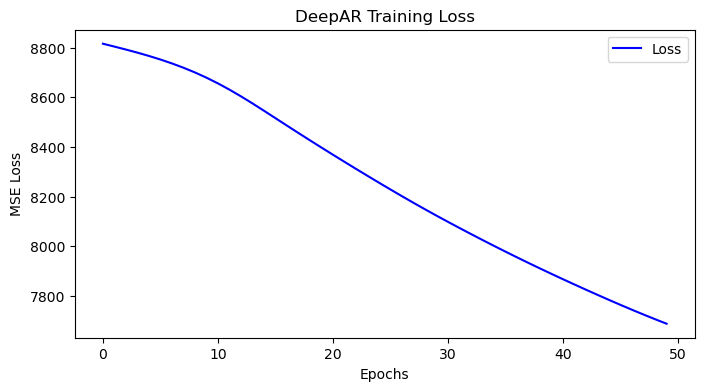

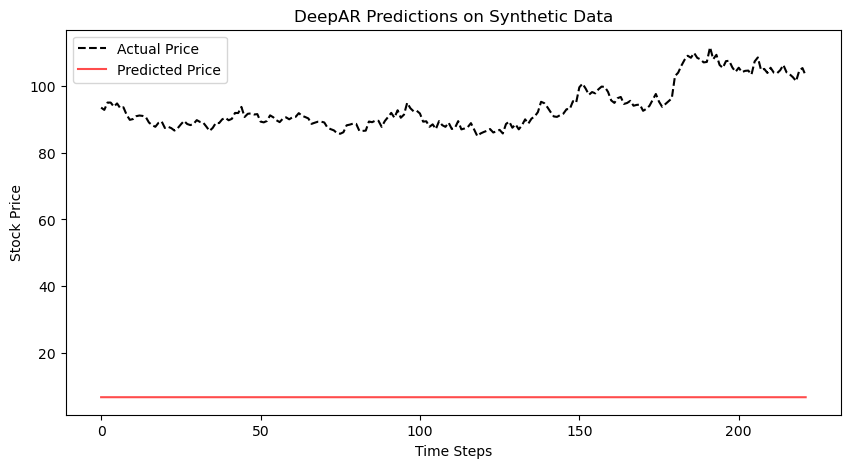

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models.deepar import DeepAR  # Import your DeepAR model

# Set device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📌 Load Synthetic Data (3 CSVs)
data_paths = ["data/synthetic_series_1.csv", "data/synthetic_series_2.csv", "data/synthetic_series_3.csv"]
datasets = [pd.read_csv(file, parse_dates=["Date"]) for file in data_paths]

# 📌 Visualize the loaded data
plt.figure(figsize=(10, 5))
for i, df in enumerate(datasets):
    plt.plot(df["Date"], df["Price"], label=f"Series {i+1}")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Synthetic Stock Price Time Series")
plt.legend()
plt.show()

# 📌 Data Preparation (Convert to Sequences)
def create_sequences(prices, seq_length=30):
    X, Y = [], []
    for i in range(len(prices) - seq_length):
        X.append(prices[i : i + seq_length])
        Y.append(prices[i + seq_length])
    return np.array(X), np.array(Y)

# Select **1st synthetic series** for training
selected_series = datasets[0]["Price"].values

# Generate sequences
seq_length = 30
X_train, Y_train = create_sequences(selected_series, seq_length)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # (batch, seq_len, input_size)
Y_train = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(-1)  # (batch, 1)

# 📌 Initialize DeepAR Model
input_size = 1  # Single feature (price)
hidden_units = 64
model = DeepAR(input_size=input_size, hidden_units=hidden_units).to(DEVICE)

# 📌 Loss Function & Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 📌 Training Loop
epochs = 50
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    preds = model(X_train.to(DEVICE))
    loss = criterion(preds.squeeze(), Y_train.to(DEVICE))
    
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss.item():.4f}")

# 📌 Plot Training Loss
plt.figure(figsize=(8, 4))
plt.plot(losses, label="Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("DeepAR Training Loss")
plt.legend()
plt.show()

# 📌 Test Predictions
model.eval()
with torch.no_grad():
    test_preds = model(X_train.to(DEVICE)).cpu().numpy()

# 📌 Plot Actual vs. Predicted
plt.figure(figsize=(10, 5))
plt.plot(Y_train.numpy(), label="Actual Price", linestyle="dashed", color="black")
plt.plot(test_preds[:, -1, 0], label="Predicted Price", color="red", alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("DeepAR Predictions on Synthetic Data")
plt.legend()
plt.show()
